<a href="https://colab.research.google.com/github/DiegoLeonG96/Tarea2_MLA/blob/main/Tarea_2_MLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>
    <em>Curso: Machine Learning Avanzado </em><br>

</div>


# Tarea 2: Red Neuronal Convolucional
**Integrantes**:
- Kurt Castro
- Diego León
- Cristian Pizarro

## 1. Introducción

## 2. Objetivo

## 3. Metodología

## 4.  Carga y Preprocesamiento de Datos

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras import models, layers, optimizers, regularizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random
import kagglehub
# Establecer la semilla para Python
random.seed(42)

# Establecer la semilla para NumPy
np.random.seed(42)

# Establecer la semilla para TensorFlow
tf.random.set_seed(42)

Activar GPU en "Entorno de Ejecución". No lo olviden o estarán horas entrenando!

In [2]:
# Verifica las GPUs disponibles
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Se encontró GPU: {gpus}")
else:
    print("No se encontró GPU. Asegúrate de haber activado el entorno con GPU en Colab.")

Se encontró GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/muffin-vs-chihuahua-image-classification")

print("Path to dataset files:", path)

100%|██████████| 474M/474M [00:24<00:00, 20.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/2


In [4]:
base_path = "/root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/2"

In [5]:
#image generator
data_generator = ImageDataGenerator(rescale=1./255,
                                    vertical_flip=True,
                                    horizontal_flip=True)

# train y test
train_dir = f'{base_path}/train'
test_dir = f'{base_path}/test'

batch_size = 16
num_classes = 2


# generators
image_size = (150, 150)
input_shape = (150, 150, 3)

# Cargar datos directamente
X_train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    image_size=image_size,
    batch_size=batch_size
)

X_test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='binary',
    image_size=image_size,
    batch_size=batch_size
)

# Convertir a tensores numpy si es necesario
X_train, y_train = [], []
for images, labels in X_train_ds:
    X_train.append(images.numpy())
    y_train.append(labels.numpy())

X_test, y_test = [], []
for images, labels in X_test_ds:
    X_test.append(images.numpy())
    y_test.append(labels.numpy())

# Combinar los datos en arreglos numpy
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train).ravel()
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test).ravel()

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Found 4733 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.
X_train shape: (4733, 150, 150, 3), y_train shape: (4733,)
X_test shape: (1184, 150, 150, 3), y_test shape: (1184,)


## 5. Aplicación de Modelos

## MLP (Multilayer Perceptron)

In [6]:
# Dimensiones originales de las imágenes
num_samples, height, width, channels = X_train.shape

# Aplanar las imágenes
X_train_flattened = X_train.reshape(num_samples, height * width * channels)

# Si tienes un conjunto de prueba
X_test_flattened = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3])

In [7]:
hidden_units = 128
model_mlp = Sequential([
    Dense(hidden_units, activation='relu'),
    Dense(1, activation='sigmoid')  # Una sola salida para clasificación binaria
])

model_mlp.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-2),
              metrics=['accuracy'])

#traint the parameters
history = model_mlp.fit(X_train_flattened, y_train,
                    epochs=10,
                    batch_size=batch_size)

#evalute the accuracy
train_acc=model_mlp.evaluate(X_train_flattened, y_train, batch_size=batch_size)[1]
test_acc=model_mlp.evaluate(X_test_flattened, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5622 - loss: 9442.9736
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6911 - loss: 0.6172
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6902 - loss: 0.6185
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6774 - loss: 0.6262
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6891 - loss: 0.6218
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5197 - loss: 0.6961
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5441 - loss: 0.6890
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5427 - loss: 0.6879
Epoch 9/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5440 - loss: 0.6882
Epoch 10/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5789 - loss: 0.6933
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5392 - loss: 0.6890
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5362 - l

## CNN (Red Neuronal Convolucional)

In [8]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')  # Una sola salida para clasificación binaria
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model_cnn.compile(loss=keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [10]:
X_train.shape

(4733, 150, 150, 3)

In [11]:
y_train.shape

(4733,)

In [12]:
history = model_cnn.fit(
X_train, y_train,
batch_size=batch_size,
epochs=10,
verbose = 1,
validation_data=(X_test, y_test)
)

#evalute the accuracy
train_acc=model_cnn.evaluate(X_train, y_train, batch_size=batch_size)[1]
test_acc=model_cnn.evaluate(X_test, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6445 - loss: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(16, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


296/296 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.6446 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.0000e+00
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7236 - loss: 0.0000e+00 - val_accuracy: 0.7660 - val_loss: 0.0000e+00
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7466 - loss: 0.0000e+00 - val_accuracy: 0.7753 - val_loss: 0.0000e+00
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7595 - loss: 0.0000e+00 - val_accuracy: 0.7829 - val_loss: 0.0000e+00
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7690 - loss: 0.0000e+00 - val_accuracy: 0.7914 - val_loss: 0.0000e+00
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7777 - loss: 0.0000e+00 - val_accuracy: 0.7990 - val_loss: 0.0000e+00
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7879 - loss: 0.0000e+00 - val_accuracy: 0.8057 - val_loss: 0.0000e+00
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/s

## CNN 2 (Segundo Modelo Red Neuronal Convolucional)

In [14]:
# Red Neuronal Convolucional (CNN) con diferentes parámetros

model_cnn2 = Sequential([
    # Capa Convolucional 1: 16 filtros de 3x3, función de activación ReLU
    Conv2D(16, (3, 3), activation='relu', input_shape=input_shape, padding='same'),  # padding='same' mantiene el tamaño de la imagen
    # Normalización por lotes para estabilizar y acelerar el entrenamiento
    BatchNormalization(),
    # Capa de Max Pooling 1: Reduce la dimensionalidad espacial
    MaxPooling2D((2, 2)),

    # Capa Convolucional 2: 32 filtros de 3x3, función de activación ReLU
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    # Normalización por lotes
    BatchNormalization(),
    # Capa de Max Pooling 2
    MaxPooling2D((2, 2)),

    # Capa Convolucional 3: 64 filtros de 3x3, función de activación ReLU
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    # Normalización por lotes
    BatchNormalization(),
    # Capa de Max Pooling 3
    MaxPooling2D((2, 2)),

    # Aplanar la salida para la capa densa
    Flatten(),

    # Capa Densa 1: 64 unidades, función de activación ReLU
    Dense(64, activation='relu'),
    # Regularización Dropout para prevenir el sobreajuste (opcional, pero recomendado)
    # layers.Dropout(0.5), # Ejemplo de dropout al 50%
    # Normalización por lotes
    BatchNormalization(),

    # Capa de Salida: 1 unidad (clasificación binaria), función de activación sigmoide
    Dense(1, activation='sigmoid')
])


# Compilar el modelo
model_cnn2.compile(loss='binary_crossentropy',  # Usamos binary_crossentropy para clasificación binaria
                  optimizer=Adam(learning_rate=1e-3), # Usamos Adam con una tasa de aprendizaje diferente al modelo anterior
                  metrics=['accuracy'])

# Entrenar el modelo
history2 = model_cnn2.fit(X_train, y_train,
                         epochs=20,  # Aumentamos el número de épocas
                         batch_size=32, # Tamaño del lote 32
                         validation_data=(X_test, y_test))

# Evaluar el modelo
train_acc2 = model_cnn2.evaluate(X_train, y_train, batch_size=32)[1]
test_acc2 = model_cnn2.evaluate(X_test, y_test, batch_size=32)[1]
print(f'Training accuracy (model_cnn2): {train_acc2:.2f}')
print(f'Test accuracy (model_cnn2): {test_acc2:.2f}')

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.8011 - loss: 0.4839 - val_accuracy: 0.7247 - val_loss: 0.5858
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9038 - loss: 0.2450 - val_accuracy: 0.8682 - val_loss: 0.3327
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9510 - loss: 0.1419 - val_accuracy: 0.8412 - val_loss: 0.3591
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9718 - loss: 0.0858 - val_accuracy: 0.8581 - val_loss: 0.3438
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9800 - loss: 0.0681 - val_accuracy: 0.8201 - val_loss: 0.5219
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9856 - loss: 0.0451 - val_accuracy: 0.9012 - val_loss: 0.2510
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9956 - loss: 0.0234 - val_accuracy: 0.8598 - val_loss: 0.4354
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9983 - loss: 0.0170 - val_ac

## 6. Comparación de Modelos

A continuación, presentaremos los resultados de los 3 modelos aplicados en el laboratorio:



*   MPL
*   CNN
*   CNN 2






37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Resultados para MLP:
Matriz de Confusión:
[[639   1]
 [544   0]]


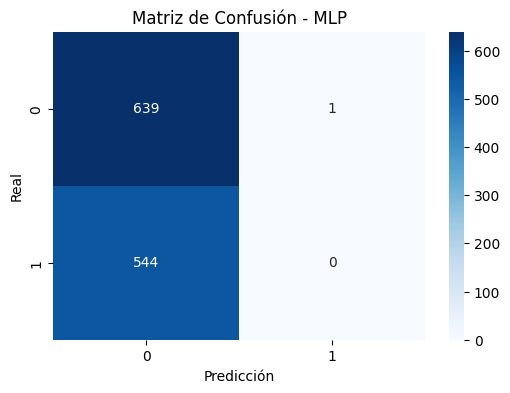

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70       640
         1.0       0.00      0.00      0.00       544

    accuracy                           0.54      1184
   macro avg       0.27      0.50      0.35      1184
weighted avg       0.29      0.54      0.38      1184

Resultados para CNN:
Matriz de Confusión:
[[510 130]
 [ 93 451]]


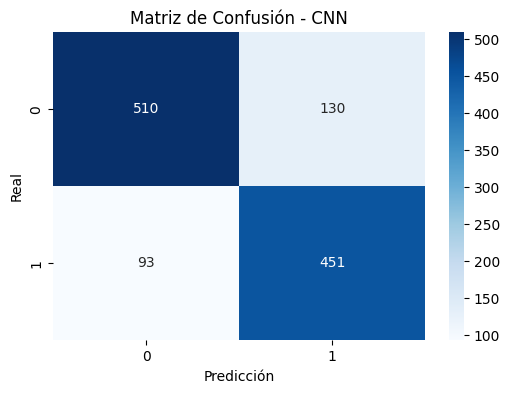

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82       640
         1.0       0.78      0.83      0.80       544

    accuracy                           0.81      1184
   macro avg       0.81      0.81      0.81      1184
weighted avg       0.81      0.81      0.81      1184

Resultados para CNN2:
Matriz de Confusión:
[[599  41]
 [ 52 492]]


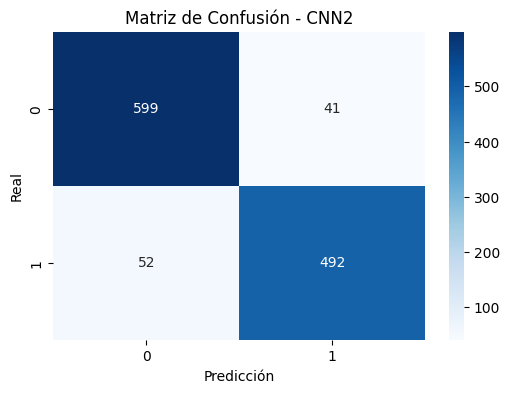

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       640
         1.0       0.92      0.90      0.91       544

    accuracy                           0.92      1184
   macro avg       0.92      0.92      0.92      1184
weighted avg       0.92      0.92      0.92      1184



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones para cada modelo
y_pred_mlp = (model_mlp.predict(X_test_flattened) > 0.5).astype("int32")
y_pred_cnn = (model_cnn.predict(X_test) > 0.5).astype("int32")
y_pred_cnn2 = (model_cnn2.predict(X_test) > 0.5).astype("int32")


# Función para mostrar la matriz de confusión y el informe de clasificación
def show_results(model_name, y_true, y_pred):
    print(f"Resultados para {model_name}:")
    cm = confusion_matrix(y_true, y_pred)
    print("Matriz de Confusión:")
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()

    cr = classification_report(y_true, y_pred)
    print("Informe de Clasificación:")
    print(cr)


# Mostrar resultados para cada modelo
show_results("MLP", y_test, y_pred_mlp)
show_results("CNN", y_test, y_pred_cnn)
show_results("CNN2", y_test, y_pred_cnn2)

## 7. Conclusiones